In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, 
                                   PowerTransformer)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             ConfusionMatrixDisplay,
                             RocCurveDisplay,
                             DetCurveDisplay,
                             classification_report)

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

In [2]:
df_raw = pd.read_csv('data.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df_raw.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df_raw.sample(10, random_state=2024)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
72     859717         M        17.20         24.52          114.20      929.4   
516    916799         M        18.31         20.58          120.80     1052.0   
469    911366         B        11.62         18.18           76.38      408.8   
69     859487         B        12.78         16.49           81.37      502.5   
331    896864         B        12.98         19.35           84.52      514.0   
487    913505         M        19.44         18.82          128.10     1167.0   
513    915940         B        14.58         13.66           94.29      658.8   
507  91544002         B        11.06         17.12           71.25      366.5   
5      843786         M        12.45         15.70           82.57      477.1   
243  88411702         B        13.75         23.77           88.54      590.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
72           0.10710           0.18300         0.16920              0.07944   
516          0.10680           0.12480         0.15690              0.09451   
469          0.11750           0.14830         0.10200              0.05564   
69           0.09831           0.05234         0.03653              0.02864   
331          0.09579           0.11250         0.07107              0.02950   
487          0.10890           0.14480         0.22560              0.11940   
513          0.09832           0.08918         0.08222              0.04349   
507          0.11940           0.10710         0.04063              0.04268   
5            0.12780           0.17000         0.15780              0.08089   
243          0.08043           0.06807         0.04697              0.02344   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
72   ...          33.82           151.60      1681.0           0.15850   
516  ...          26.20           142.20      1493.0           0.14920   
469  ...          25.40            88.14       528.1           0.17800   
69   ...          19.76            85.67       554.9           0.12960   
331  ...          21.95            99.21       634.3           0.12880   
487  ...          30.39           153.90      1740.0           0.15140   
513  ...          17.24           108.50       862.0           0.12230   
507  ...          20.74            76.08       411.1           0.16620   
5    ...          23.75           103.40       741.6           0.17910   
243  ...          26.34            98.00       706.0           0.09368   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
72             0.73940           0.6566               0.18990          0.3313   
516            0.25360           0.3759               0.15100          0.3074   
469            0.28780           0.3186               0.14160          0.2660   
69             0.07061           0.1039               0.05882          0.2383   
331            0.32530           0.3439               0.09858          0.3596   
487            0.37250           0.5936               0.20600          0.3266   
513            0.19280           0.2492               0.09186          0.2626   
507            0.20310           0.1256               0.09514          0.2780   
5              0.52490           0.5355               0.17410          0.3985   
243            0.14420           0.1359               0.06106          0.2663   

     fractal_dimension_worst  Unnamed: 32  
72                   0.13390          NaN  
516                  0.07863          NaN  
469                  0.09270          NaN  
69                   0.06410          NaN  
331                  0.09166          NaN  
487                  0.09009          NaN  
513                  0.07048          NaN  
507                  0.11680          NaN  
5                    0.12440          NaN  
243                  0.06321          NaN  

[10 rows x 33 columns]

In [5]:
df_raw.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Transformacion y preprocesamiento
df_interim = (
    df_raw
    .copy()
    #.filter(regex='(_mean$|^diagnosis$)')
    .set_axis(
        #df_raw.filter(regex='(_mean$|^diagnosis$)').columns.str.replace(' ', '_')
        df_raw.columns.str.replace(' ', '_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1

    )
    #.drop(['id', 'unnamed_32'])
    .drop_duplicates()
    .rename(columns={"diagnosis":"target"})
    .astype({"target":"category"})
    .iloc[:,1:-1]
)
df_interim

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        M        17.99         10.38          122.80     1001.0   
1        M        20.57         17.77          132.90     1326.0   
2        M        19.69         21.25          130.00     1203.0   
3        M        11.42         20.38           77.58      386.1   
4        M        20.29         14.34          135.10     1297.0   
..     ...          ...           ...             ...        ...   
564      M        21.56         22.39          142.00     1479.0   
565      M        20.13         28.25          131.20     1261.0   
566      M        16.60         28.08          108.30      858.1   
567      M        20.60         29.33          140.10     1265.0   
568      B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
5

In [19]:
df_interim.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)

In [9]:
# EDA 

df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['target'])

In [20]:
features_mean=list(df.columns[1:11])

In [22]:
dfM=df[df['target'] ==1]
dfB=df[df['target'] ==0]

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

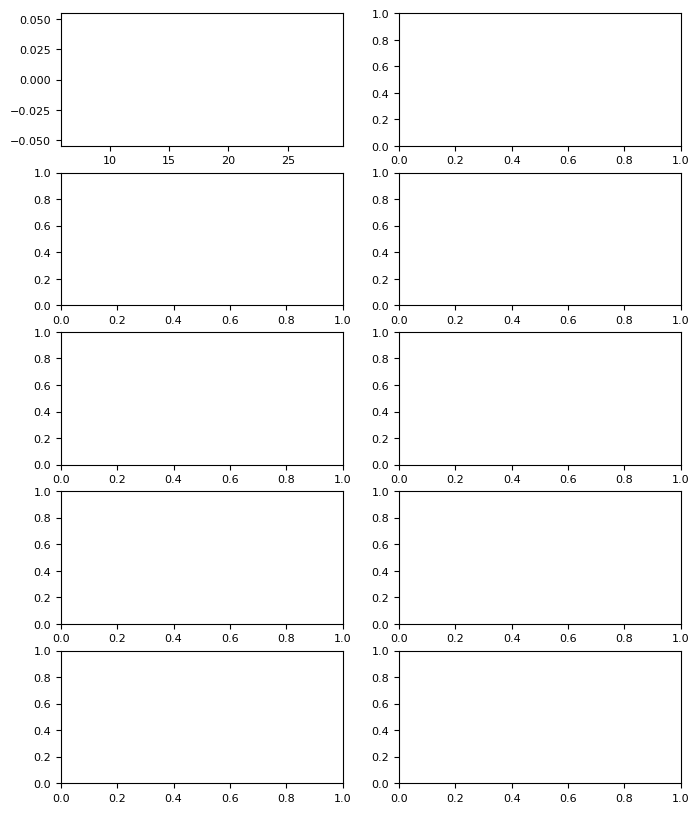

In [24]:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [10]:
power_transformer = PowerTransformer()
X_train = power_transformer.fit_transform(df_train.drop('target',axis=1))
X_test = power_transformer.transform(df_test.drop('target',axis=1))
df_train_tf = pd.DataFrame(X_train, columns=df_train.drop('target',axis=1).columns).reset_index(drop=True)
df_test_tf = pd.DataFrame(X_test, columns=df_test.drop('target',axis=1).columns).reset_index(drop=True)
df_train_tf['target'] = df_train['target'].values
df_test_tf['target'] = df_test['target'].values
df_train.info()
display(df_train_tf.sample(4))
display(df_test_tf.sample(4))

/workspaces/Breast_Cancer/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:3477: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [ ]:
df_train = df_train_tf 
df_test = df_test_tf 

In [ ]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

count          mean       std       min       25%  \
radius_mean             455.0 -3.689357e-15  1.001101 -3.292508 -0.654322   
texture_mean            455.0  2.693816e-16  1.001101 -2.960411 -0.689892   
perimeter_mean          455.0  6.301187e-15  1.001101 -3.325331 -0.661086   
area_mean               455.0  1.194649e-15  1.001101 -3.346972 -0.655487   
smoothness_mean         455.0  7.964325e-16  1.001101 -2.773955 -0.715841   
compactness_mean        455.0 -2.498612e-16  1.001101 -2.230518 -0.786668   
concavity_mean          455.0  6.246530e-17  1.001101 -1.711796 -0.833901   
concave_points_mean     455.0  7.808162e-18  1.001101 -1.895523 -0.766773   
symmetry_mean           455.0 -2.420530e-16  1.001101 -3.099506 -0.673959   
fractal_dimension_mean  455.0 -7.433370e-15  1.001101 -2.675767 -0.751434   

                             50%       75%       max  
radius_mean            -0.066807  0.677156  2.585402  
texture_mean           -0.001985  0.644349  2.786694  
perimeter_mean         -0.071570  0.693303  2.563222  
area_mean              -0.068125  0.675591  2.626735  
smoothness_mean         0.005300  0.688134  2.904203  
compactness_mean       -0.069773  0.767142  2.423041  
concavity_mean         -0.156647  0.771559  2.120679  
concave_points_mean    -0.235738  0.843949  2.123425  
symmetry_mean           0.042085  0.652354  3.311655  
fractal_dimension_mean -0.004887  0.677346  2.829078

count unique top freq
target   455      2   B  285

In [ ]:
df_raw.sample(10, random_state=2024)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
72     859717         M        17.20         24.52          114.20      929.4   
516    916799         M        18.31         20.58          120.80     1052.0   
469    911366         B        11.62         18.18           76.38      408.8   
69     859487         B        12.78         16.49           81.37      502.5   
331    896864         B        12.98         19.35           84.52      514.0   
487    913505         M        19.44         18.82          128.10     1167.0   
513    915940         B        14.58         13.66           94.29      658.8   
507  91544002         B        11.06         17.12           71.25      366.5   
5      843786         M        12.45         15.70           82.57      477.1   
243  88411702         B        13.75         23.77           88.54      590.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
72           0.10710           0.18300         0.16920              0.07944   
516          0.10680           0.12480         0.15690              0.09451   
469          0.11750           0.14830         0.10200              0.05564   
69           0.09831           0.05234         0.03653              0.02864   
331          0.09579           0.11250         0.07107              0.02950   
487          0.10890           0.14480         0.22560              0.11940   
513          0.09832           0.08918         0.08222              0.04349   
507          0.11940           0.10710         0.04063              0.04268   
5            0.12780           0.17000         0.15780              0.08089   
243          0.08043           0.06807         0.04697              0.02344   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
72   ...          33.82           151.60      1681.0           0.15850   
516  ...          26.20           142.20      1493.0           0.14920   
469  ...          25.40            88.14       528.1           0.17800   
69   ...          19.76            85.67       554.9           0.12960   
331  ...          21.95            99.21       634.3           0.12880   
487  ...          30.39           153.90      1740.0           0.15140   
513  ...          17.24           108.50       862.0           0.12230   
507  ...          20.74            76.08       411.1           0.16620   
5    ...          23.75           103.40       741.6           0.17910   
243  ...          26.34            98.00       706.0           0.09368   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
72             0.73940           0.6566               0.18990          0.3313   
516            0.25360           0.3759               0.15100          0.3074   
469            0.28780           0.3186               0.14160          0.2660   
69             0.07061           0.1039               0.05882          0.2383   
331            0.32530           0.3439               0.09858          0.3596   
487            0.37250           0.5936               0.20600          0.3266   
513            0.19280           0.2492               0.09186          0.2626   
507            0.20310           0.1256               0.09514          0.2780   
5              0.52490           0.5355               0.17410          0.3985   
243            0.14420           0.1359               0.06106          0.2663   

     fractal_dimension_worst  Unnamed: 32  
72                   0.13390          NaN  
516                  0.07863          NaN  
469                  0.09270          NaN  
69                   0.06410          NaN  
331                  0.09166          NaN  
487                  0.09009          NaN  
513                  0.07048          NaN  
507                  0.11680          NaN  
5                    0.12440          NaN  
243                  0.06321          NaN  

[10 rows x 33 columns]

In [ ]:
table = pd.concat(
    [
        df_train['target'].value_counts(), 
        df_train['target'].value_counts(normalize=True)
    ],axis=1
)
display(table)

count  proportion
target                   
B         285    0.626374
M         170    0.373626

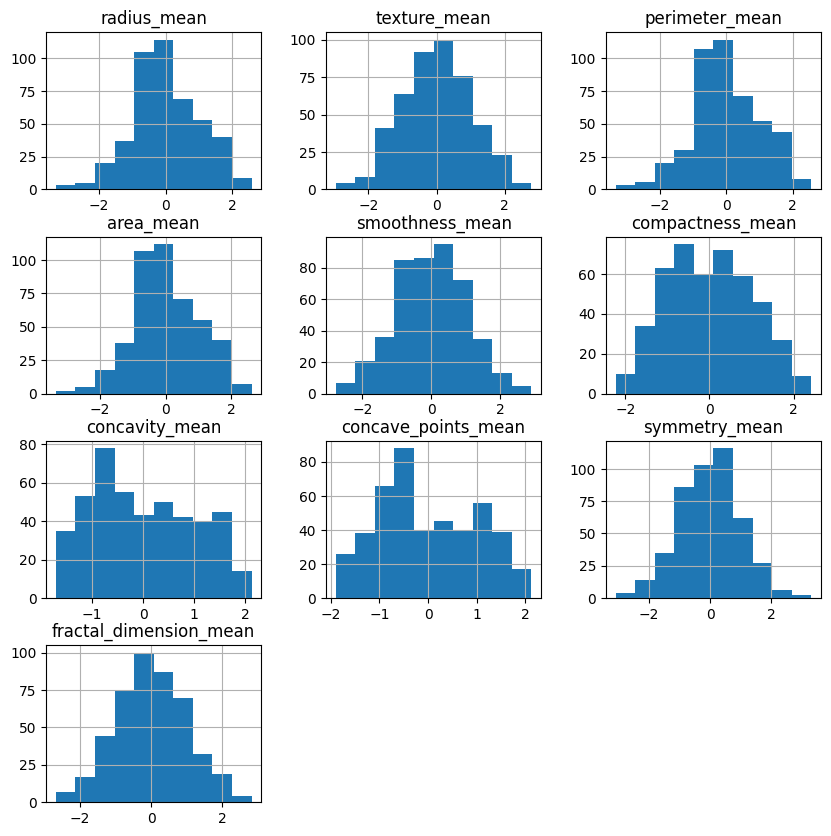

In [ ]:
df_train.hist(figsize=(10,10))
plt.show()

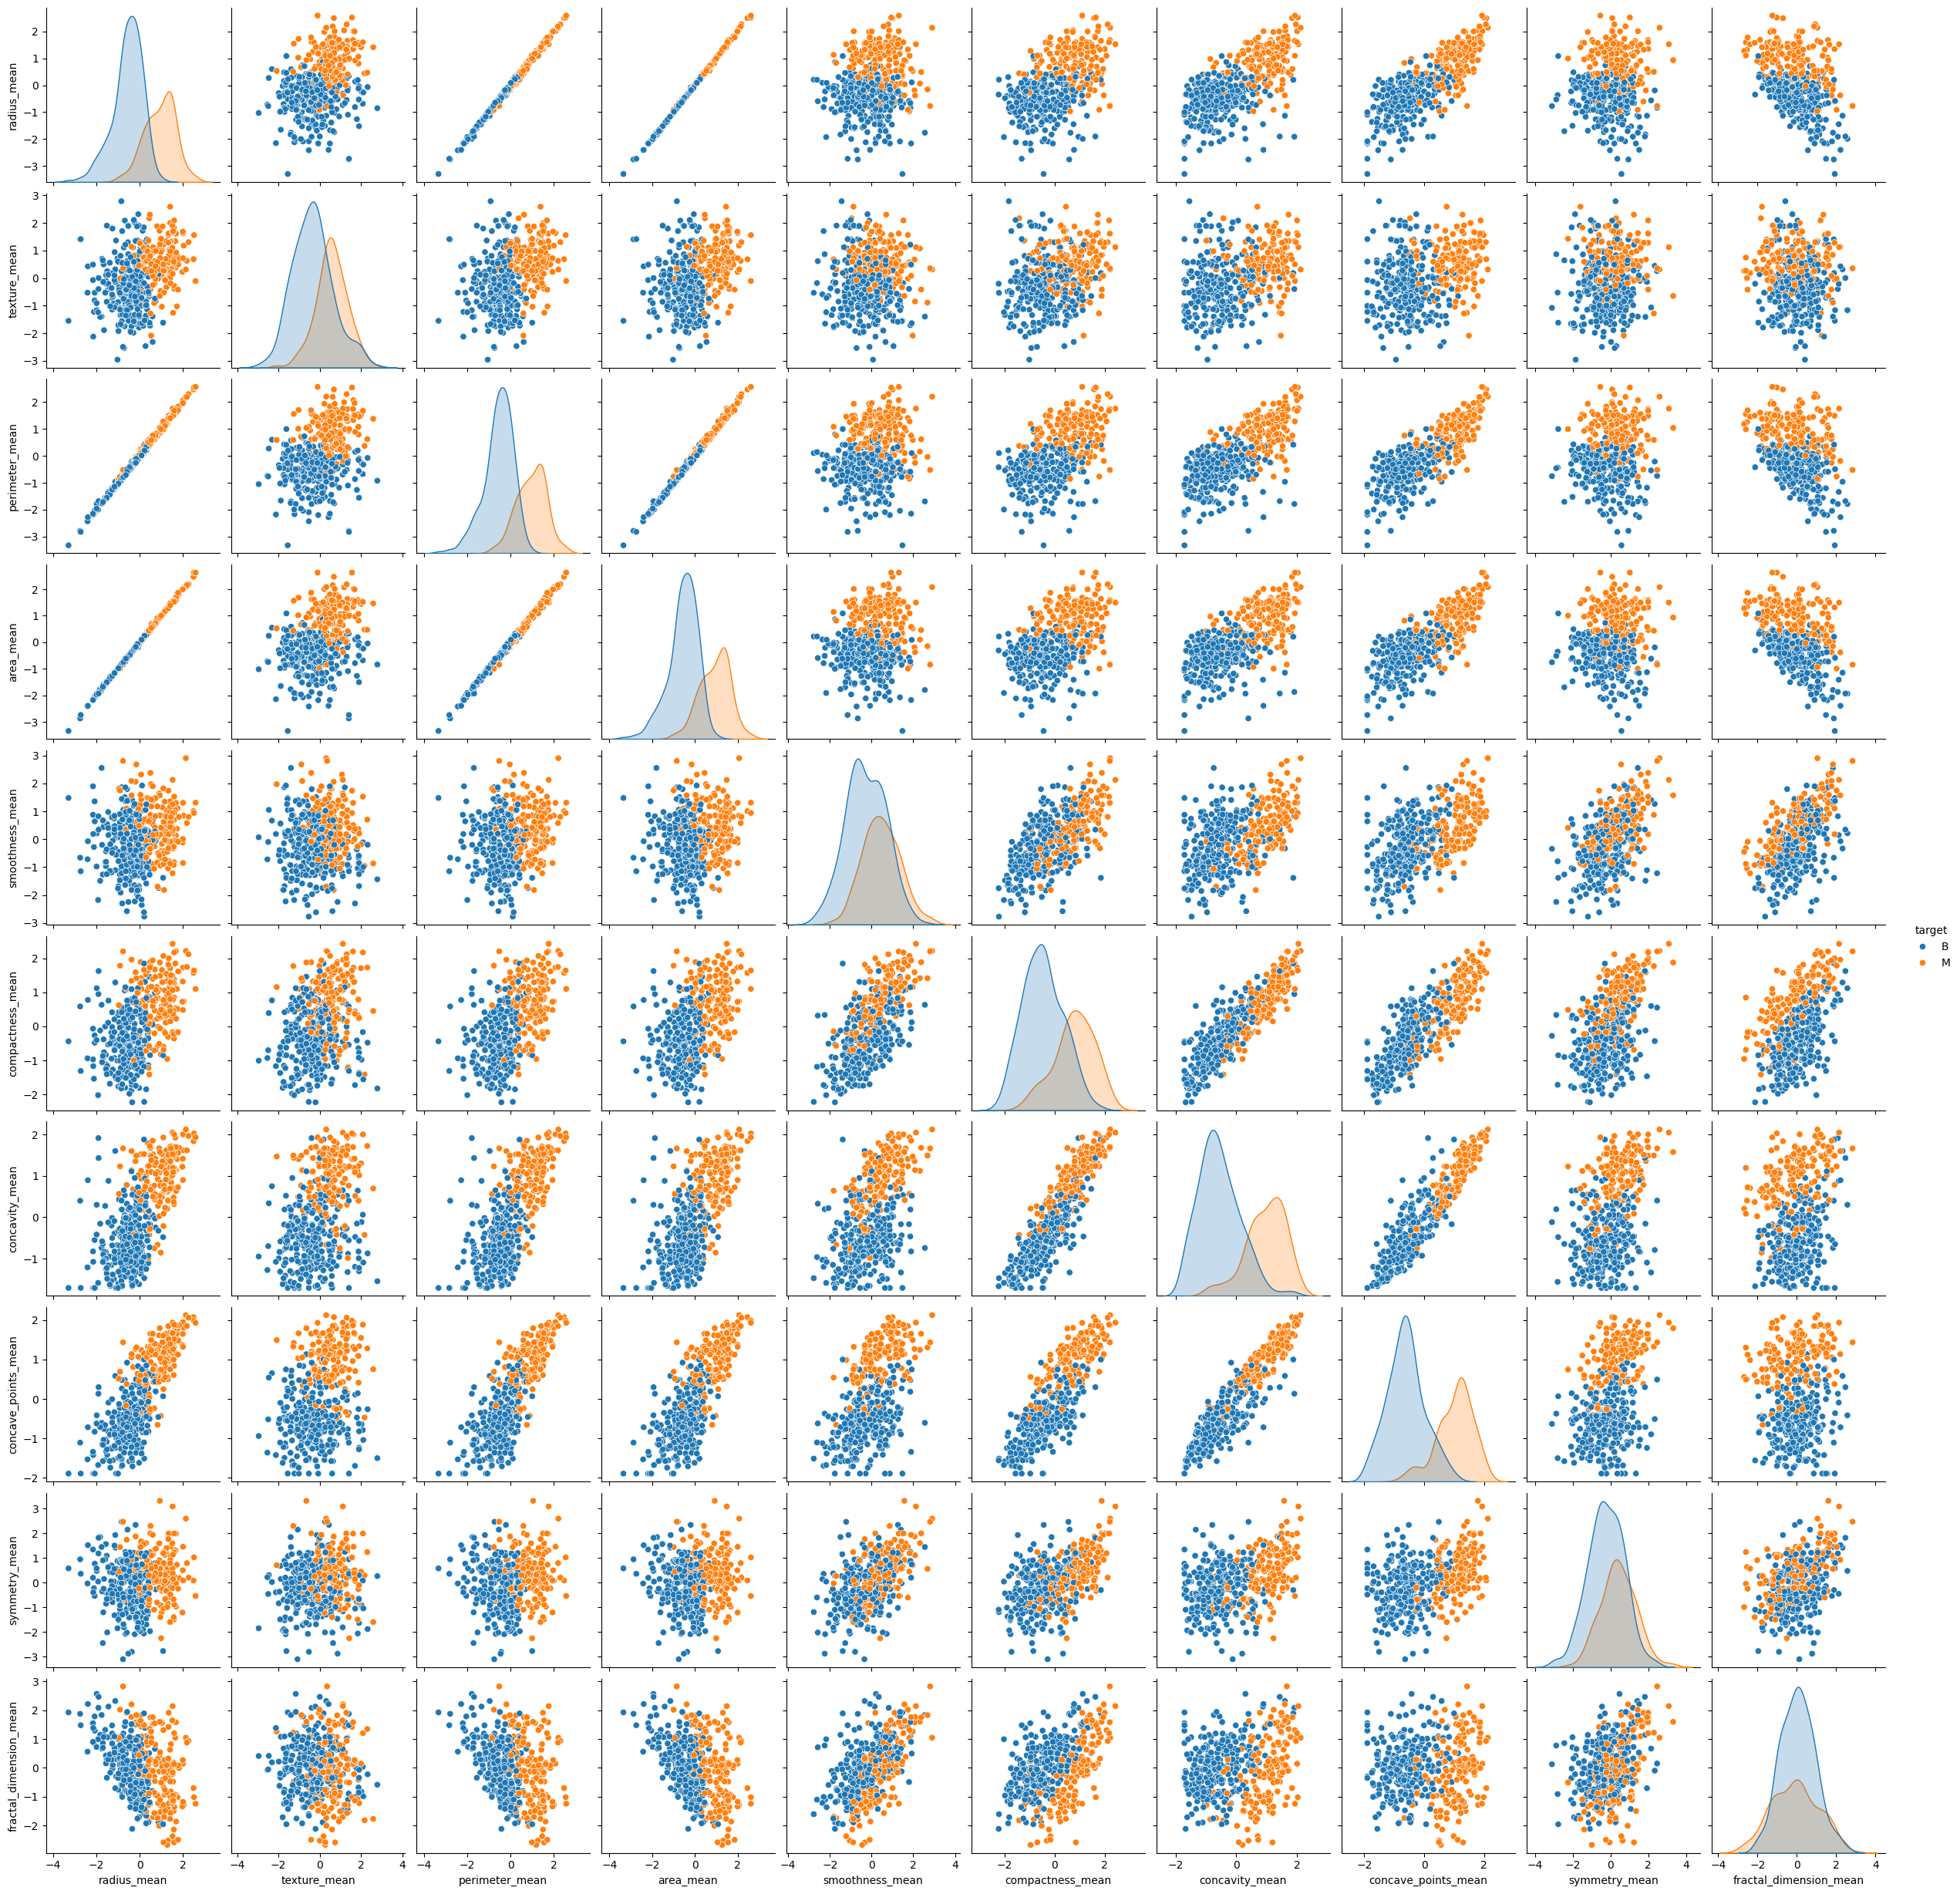

In [ ]:
#Analisis bivariado
sns.pairplot(data=df_train, hue='target')
plt.show()

In [ ]:
df_train.select_dtypes("number").corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.334472        0.998190   0.999637   
texture_mean               0.334472      1.000000        0.341900   0.335811   
perimeter_mean             0.998190      0.341900        1.000000   0.997562   
area_mean                  0.999637      0.335811        0.997562   1.000000   
smoothness_mean            0.139790      0.032255        0.172787   0.131274   
compactness_mean           0.494921      0.293327        0.541286   0.486640   
concavity_mean             0.661268      0.361858        0.697240   0.658322   
concave_points_mean        0.787160      0.328644        0.814056   0.783430   
symmetry_mean              0.095249      0.118531        0.124311   0.088473   
fractal_dimension_mean    -0.401241     -0.049051       -0.356060  -0.408932   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.139790          0.494921        0.661268   
texture_mean                   0.032255          0.293327        0.361858   
perimeter_mean                 0.172787          0.541286        0.697240   
area_mean                      0.131274          0.486640        0.658322   
smoothness_mean                1.000000          0.660139        0.492662   
compactness_mean               0.660139          1.000000        0.893847   
concavity_mean                 0.492662          0.893847        1.000000   
concave_points_mean            0.544854          0.841427        0.932075   
symmetry_mean                  0.517713          0.527908        0.417931   
fractal_dimension_mean         0.554031          0.482774        0.226624   

                        concave_points_mean  symmetry_mean  \
radius_mean                        0.787160       0.095249   
texture_mean                       0.328644       0.118531   
perimeter_mean                     0.814056       0.124311   
area_mean                          0.783430       0.088473   
smoothness_mean                    0.544854       0.517713   
compactness_mean                   0.841427       0.527908   
concavity_mean                     0.932075       0.417931   
concave_points_mean                1.000000       0.401669   
symmetry_mean                      0.401669       1.000000   
fractal_dimension_mean             0.090606       0.406997   

                        fractal_dimension_mean  
radius_mean                          -0.401241  
texture_mean                         -0.049051  
perimeter_mean                       -0.356060  
area_mean                            -0.408932  
smoothness_mean                       0.554031  
compactness_mean                      0.482774  
concavity_mean                        0.226624  
concave_points_mean                   0.090606  
symmetry_mean                         0.406997  
fractal_dimension_mean                1.000000

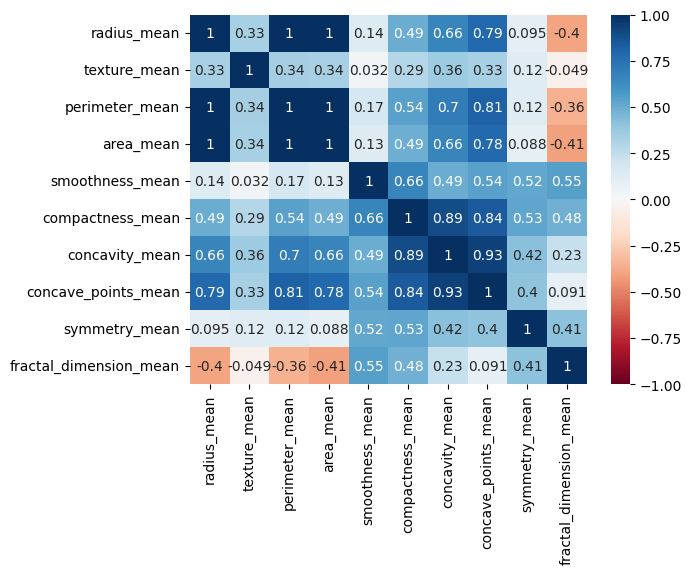

In [ ]:
sns.heatmap(df_train.select_dtypes("number").corr(),vmin=-1, vmax=1, annot = True, cmap="RdBu")
plt.show()

In [ ]:
X_train = df_train.drop("target", axis=1).reset_index(drop=True)
Y_train = df_train["target"].reset_index(drop=True)

X_test = df_test.drop("target", axis=1).reset_index(drop=True)
Y_test = df_test["target"].reset_index(drop=True)

In [ ]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(Y_train)
y_test_enc = label_encoder.transform(Y_test)

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree.fit(X_train, y_train_enc)

DecisionTreeClassifier(max_depth=4)

Accuracy: 0.95
F1 Score: 0.93
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        72
           M       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



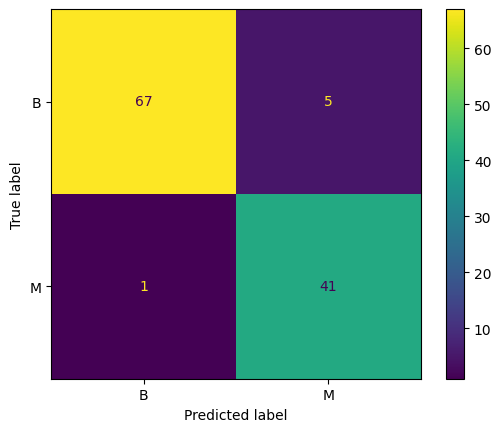

In [ ]:
y_pred = clf_tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test_enc, y_pred):.2f}')
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred, display_labels=label_encoder.classes_)
plt.show()

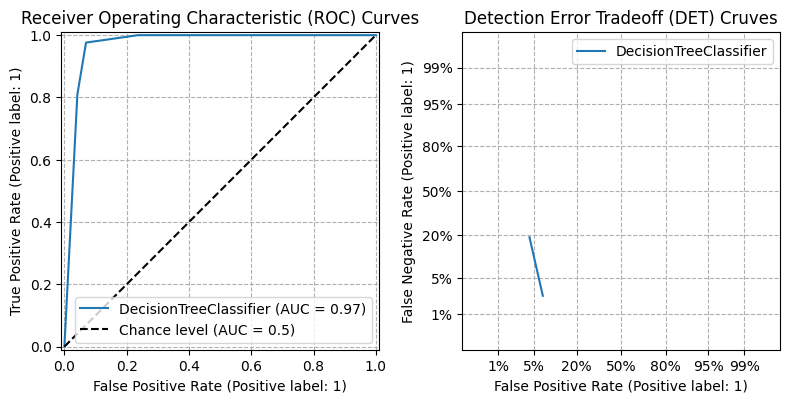

In [ ]:
fig, [ax_roc, ax_det] = plt.subplots(1,2, figsize=(8,8))
RocCurveDisplay.from_estimator(
    clf_tree, X_test, y_test_enc, ax=ax_roc, plot_chance_level=True
)
DetCurveDisplay.from_estimator(
    clf_tree, X_test, y_test_enc, ax=ax_det
)
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curves")
ax_det.set_title("Detection Error Tradeoff (DET) Cruves")
ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')
ax_det.set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

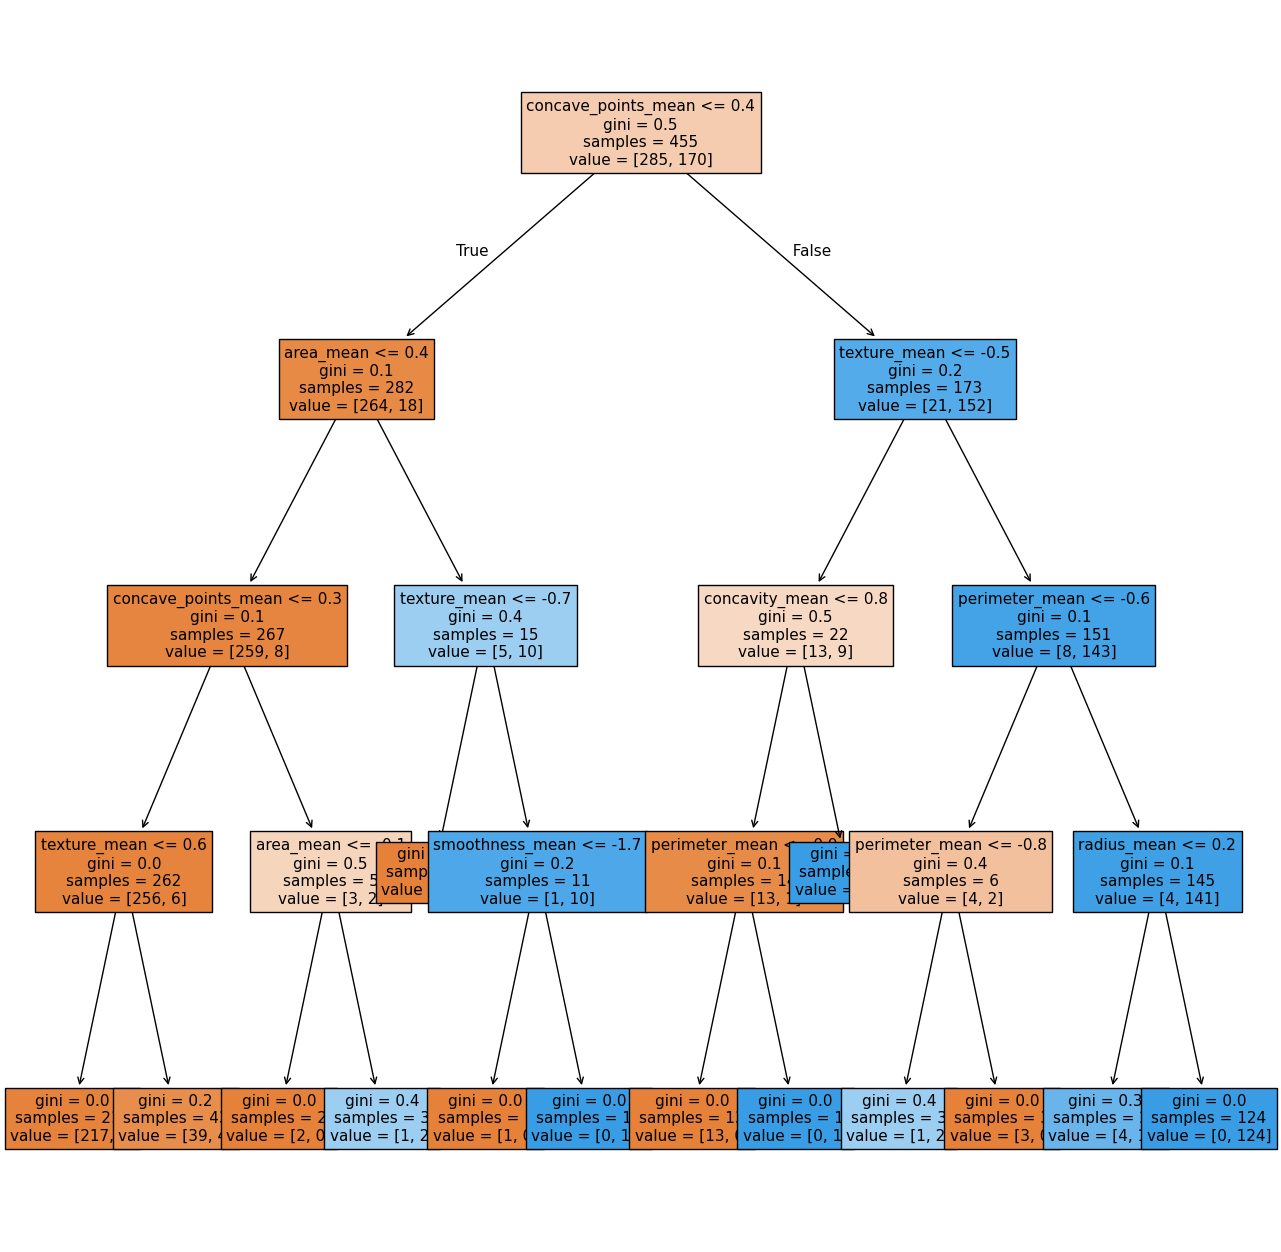

In [ ]:
plt.figure(figsize=(16,16))
plot_tree(clf_tree, filled=True,feature_names=X_train.columns, fontsize=11, precision=1)
plt.show()

In [ ]:
model_dict = {
    "model": clf_tree,
    "predictors":X_train.columns.to_list(),
    "algorithm name":"Decision Tree Classifier"
    }

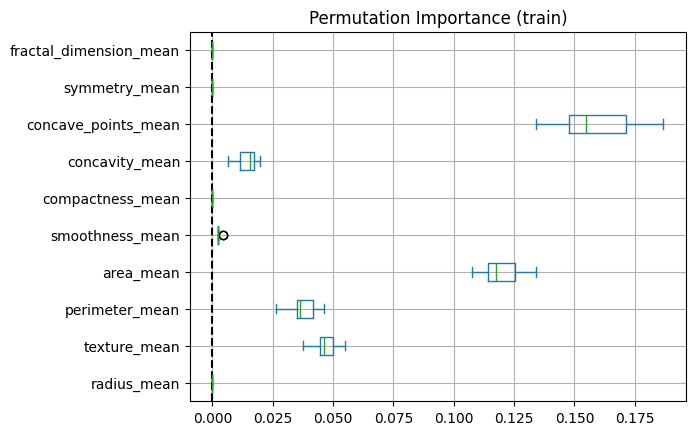

In [ ]:
importance = permutation_importance(clf_tree, X_train, y_train_enc, n_repeats=10, random_state=2024 )
importance_df = pd.DataFrame(importance.importances.T, columns=X_train.columns)
ax = importance_df.plot.box(vert=False)
ax.axvline(x=0, color='k', linestyle = "--")
ax.grid(True)
ax.set_title("Permutation Importance (train)")
plt.show()